# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')

Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Each row in the table represents a single turbine.

In [3]:
turbine |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

In [4]:
province = turbine|> pull(province_territory)

In [5]:
province %>% factor %>% levels

[1] "Alberta"                   "British Columbia"         
 [3] "Manitoba"                  "New Brunswick"            
 [5] "Newfoundland and Labrador" "Northwest Territories"    
 [7] "Nova Scotia"               "Ontario"                  
 [9] "Prince Edward Island"      "Quebec"                   
[11] "Saskatchewan"              "Yukon"

In [6]:
province |> fct_infreq() |> levels()

[1] "Ontario"                   "Quebec"                   
 [3] "Alberta"                   "Nova Scotia"              
 [5] "British Columbia"          "Saskatchewan"             
 [7] "Manitoba"                  "New Brunswick"            
 [9] "Prince Edward Island"      "Newfoundland and Labrador"
[11] "Northwest Territories"     "Yukon"

In [17]:
turbine2 = turbine |>
    group_by(province_territory) |>
    mutate(prov_freq = n()) |>
    ungroup() |>
    arrange(desc(prov_freq)) |>
    mutate(province_territory = province_territory |> fct_infreq())


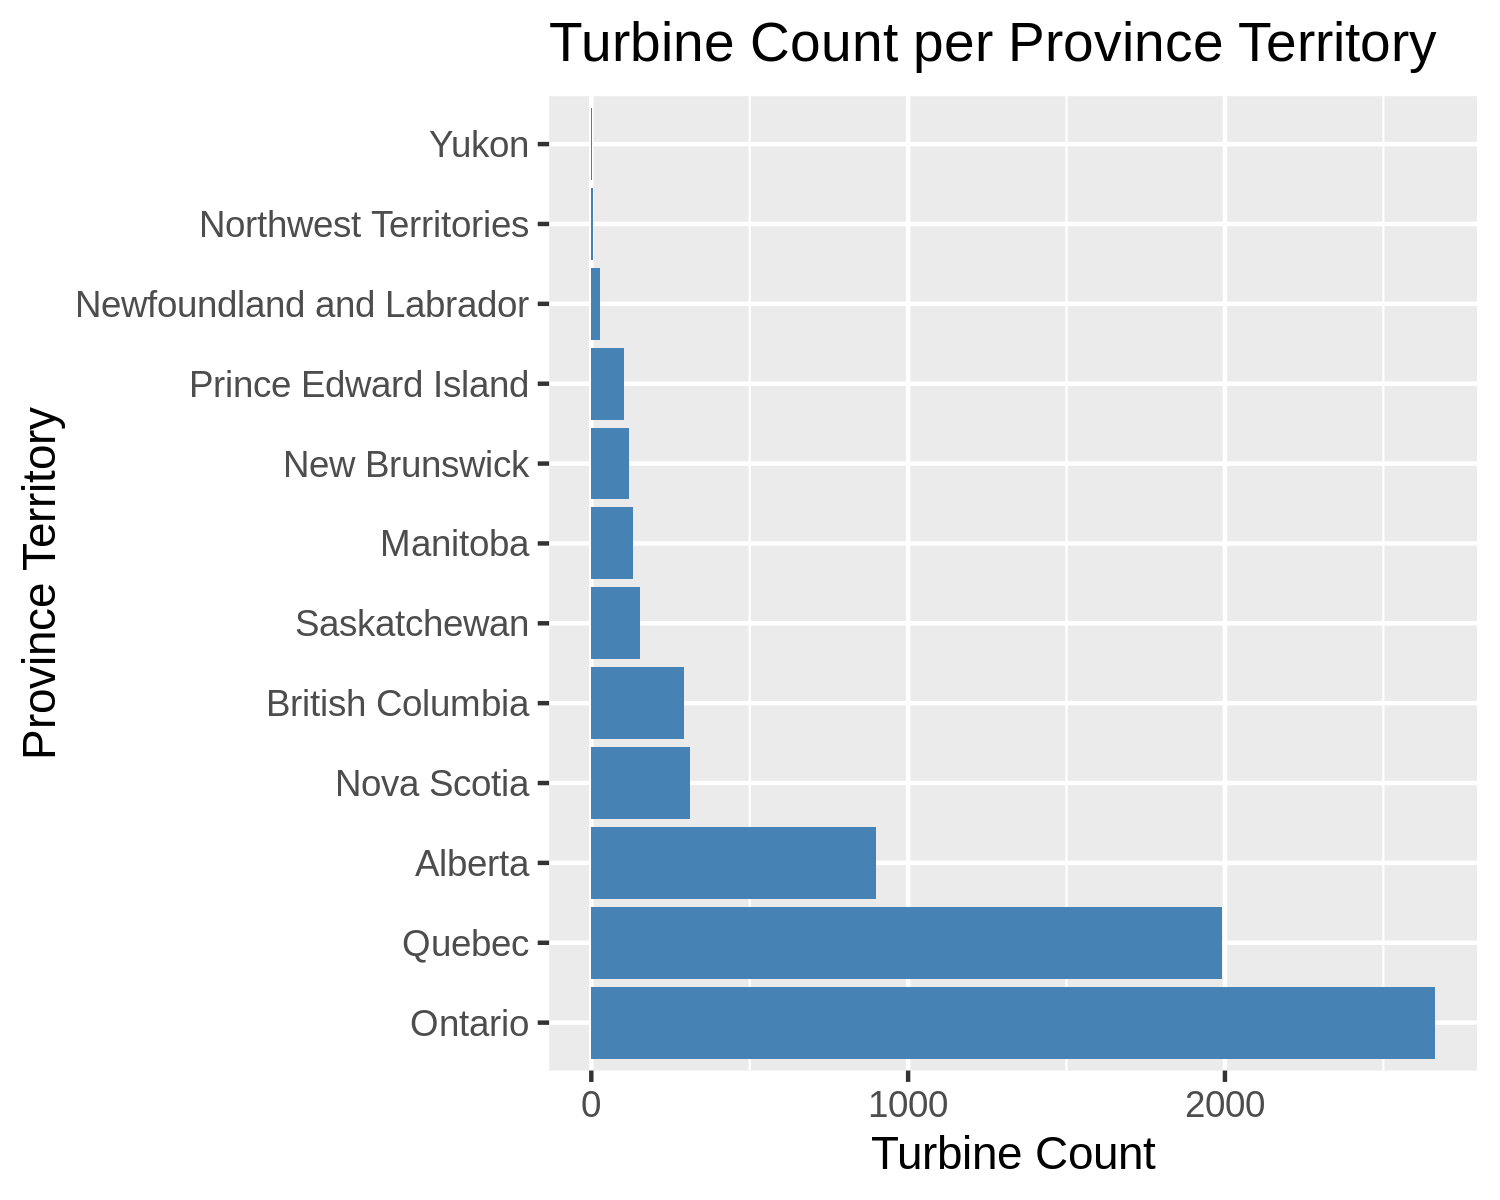

In [8]:
p = ggplot(turbine2, aes(y = province_territory)) + geom_bar(fill = "steelblue") +
    labs(title = "Turbine Count per Province Territory", 
         x = "Turbine Count", y = "Province Territory")
    
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [9]:
manufreq = turbine |> pull(manufacturer) 

In [11]:
manufreq |> fct_lump(n = 9) |> fct_infreq() |> levels()

[1] "Vestas"             "GE"                 "Siemens"           
 [4] "Enercon"            "Senvion"            "NEG Micon"         
 [7] "Other"              "Acciona Wind Power" "Acciona"           
[10] "Nordex"

In [16]:
turbine3 = turbine |>
    group_by(manufacturer) |>
    mutate(manu_freq = n()) |>
    ungroup() |>
    arrange(desc(manufacturer)) |>
    mutate(manufacturer = manufacturer |> fct_lump(n = 9) |> fct_infreq())


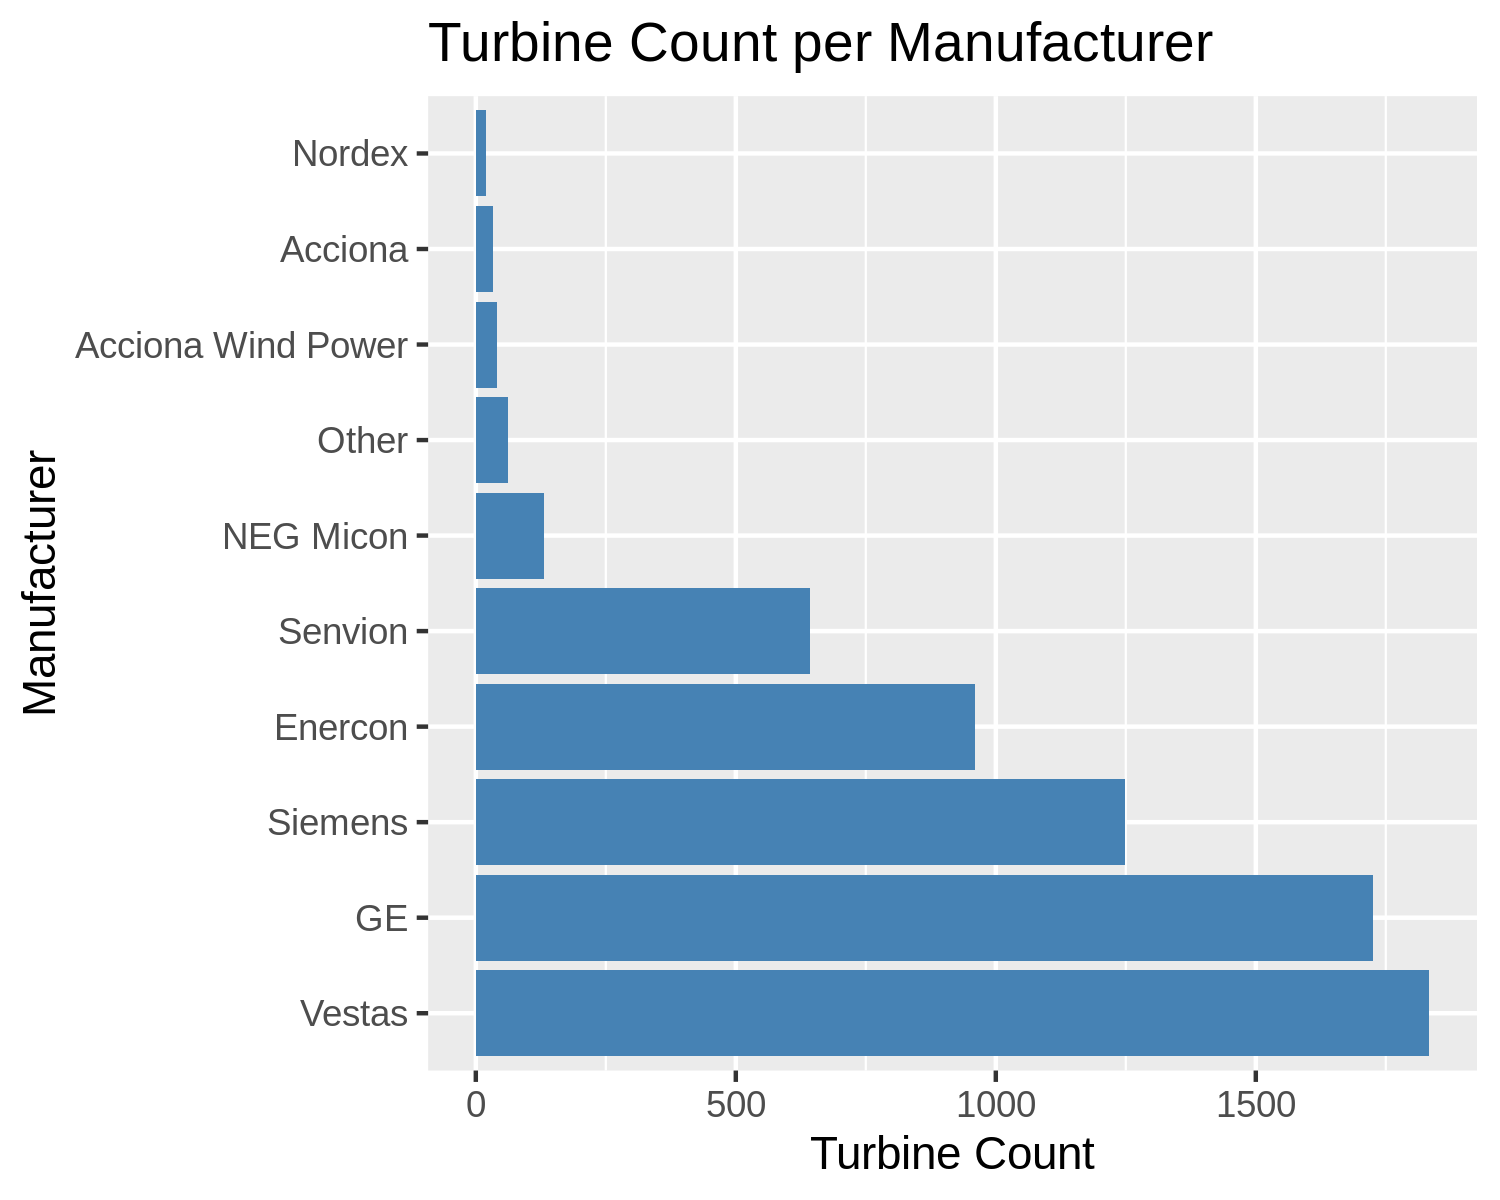

In [18]:
p = ggplot(turbine3, aes(y = manufacturer)) + geom_bar(fill = "steelblue") +
    labs(title = "Turbine Count per Manufacturer", x = "Turbine Count", y = "Manufacturer")
p


In [14]:
turbine4 = turbine |>
    group_by(manufacturer) |>
    mutate(manu_freq = n()) |>
    ungroup() |>
    arrange(desc(manufacturer)) |>
    mutate(manufacturer = manufacturer |> fct_lump(n = 9) |> fct_infreq()) |>
    mutate(manu = fct_relevel(manufacturer, "Other", after = Inf))

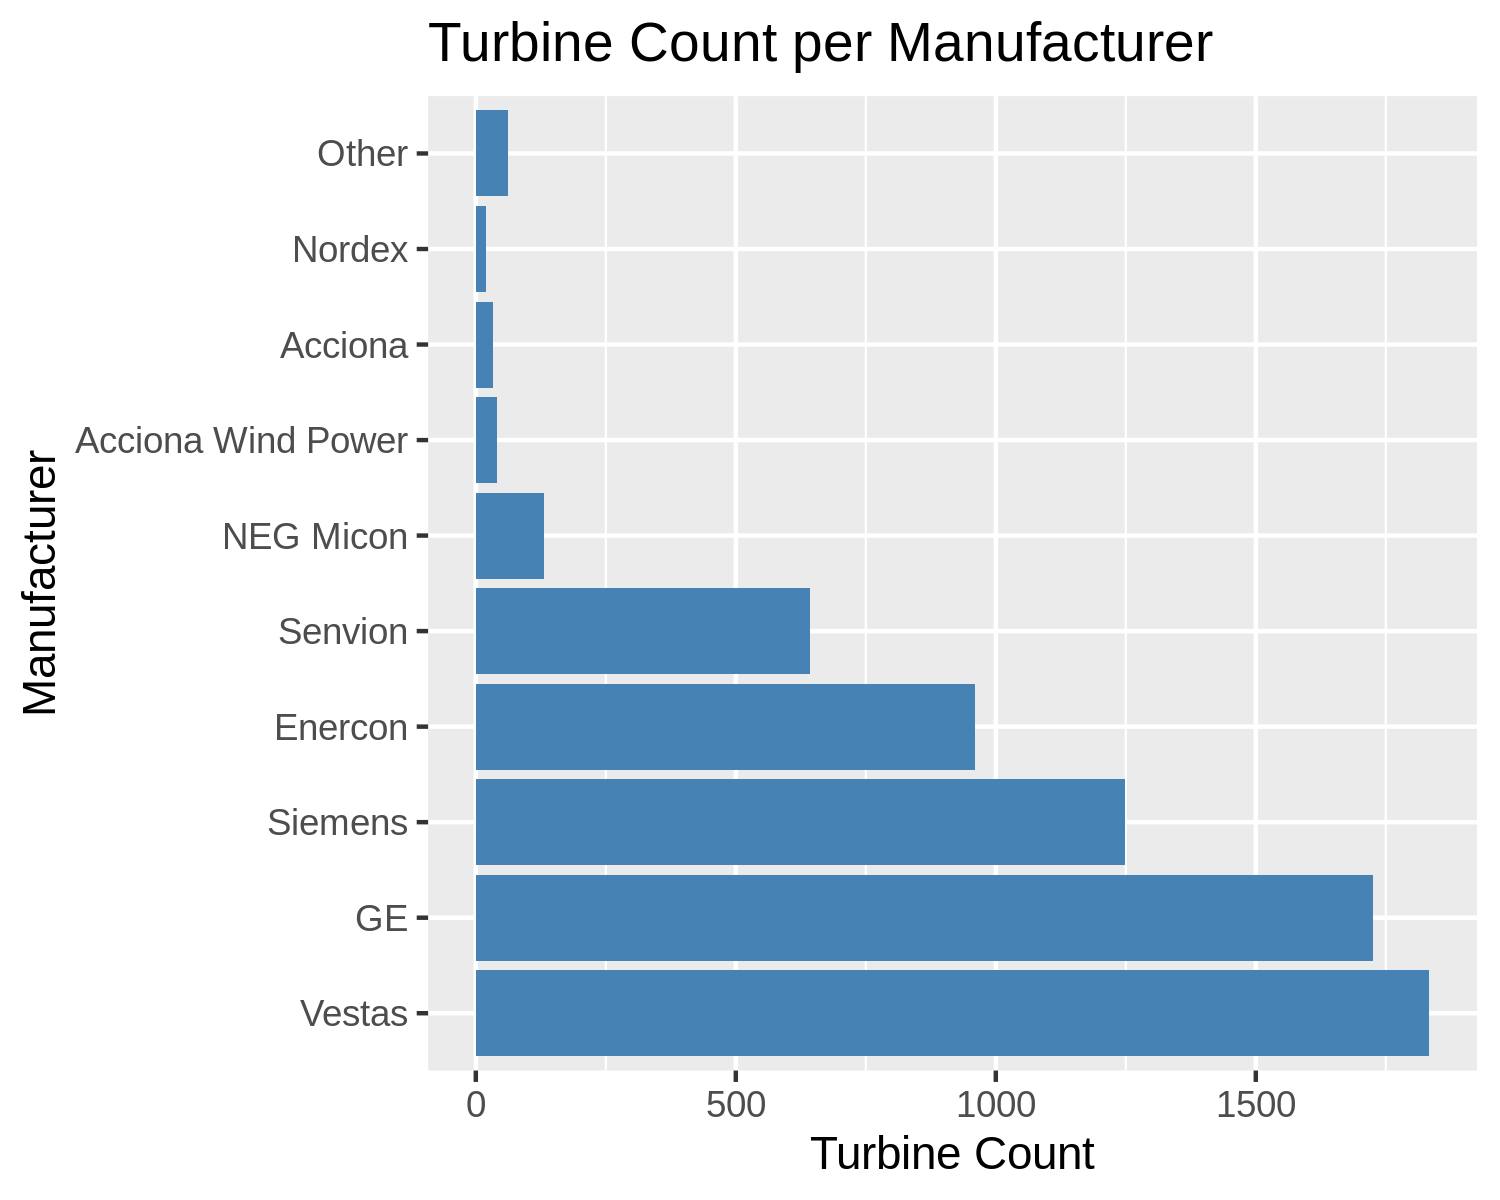

In [15]:
p = ggplot(turbine4, aes(y = manu)) + geom_bar(fill = 'steelblue') +
    labs(title = "Turbine Count per Manufacturer", x = "Turbine Count", y = "Manufacturer")
p